# Load DPC data files and make top level statistics

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

## (1) load pickle file duopoly_feedback.data
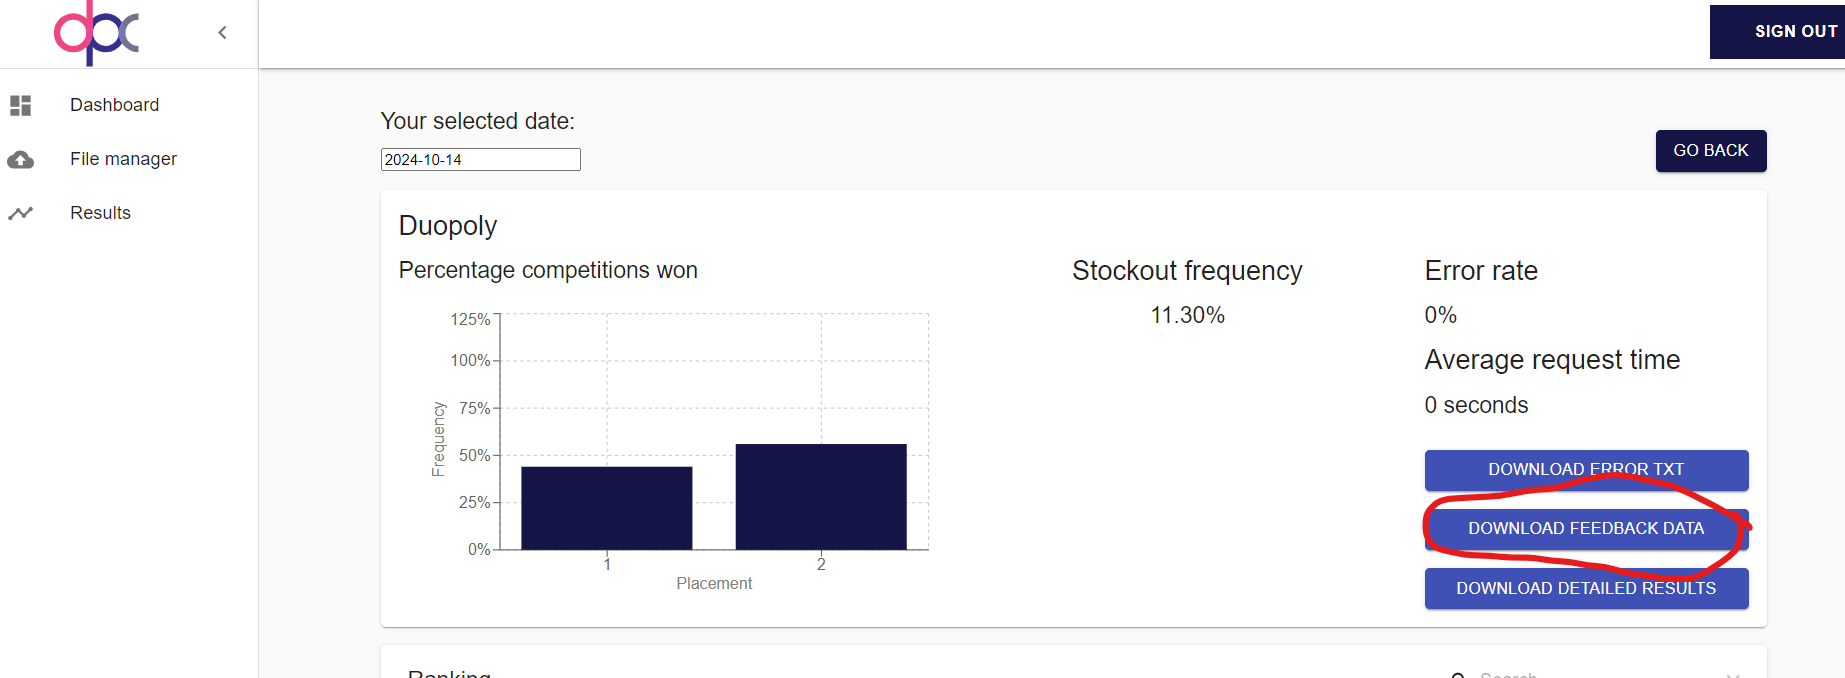

In [2]:
with open('duopoly_feedback.data', 'rb') as handle:
    feedback = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'duopoly_feedback.data'

In [2]:
feedback.keys()

NameError: name 'feedback' is not defined

In [ ]:
feedback['history'].head(10)

In [ ]:
feedback['current_simulation']

In [ ]:
feedback['cumulative_revenue_current_selling_season']

## (2) load duopoly_competition_details.csv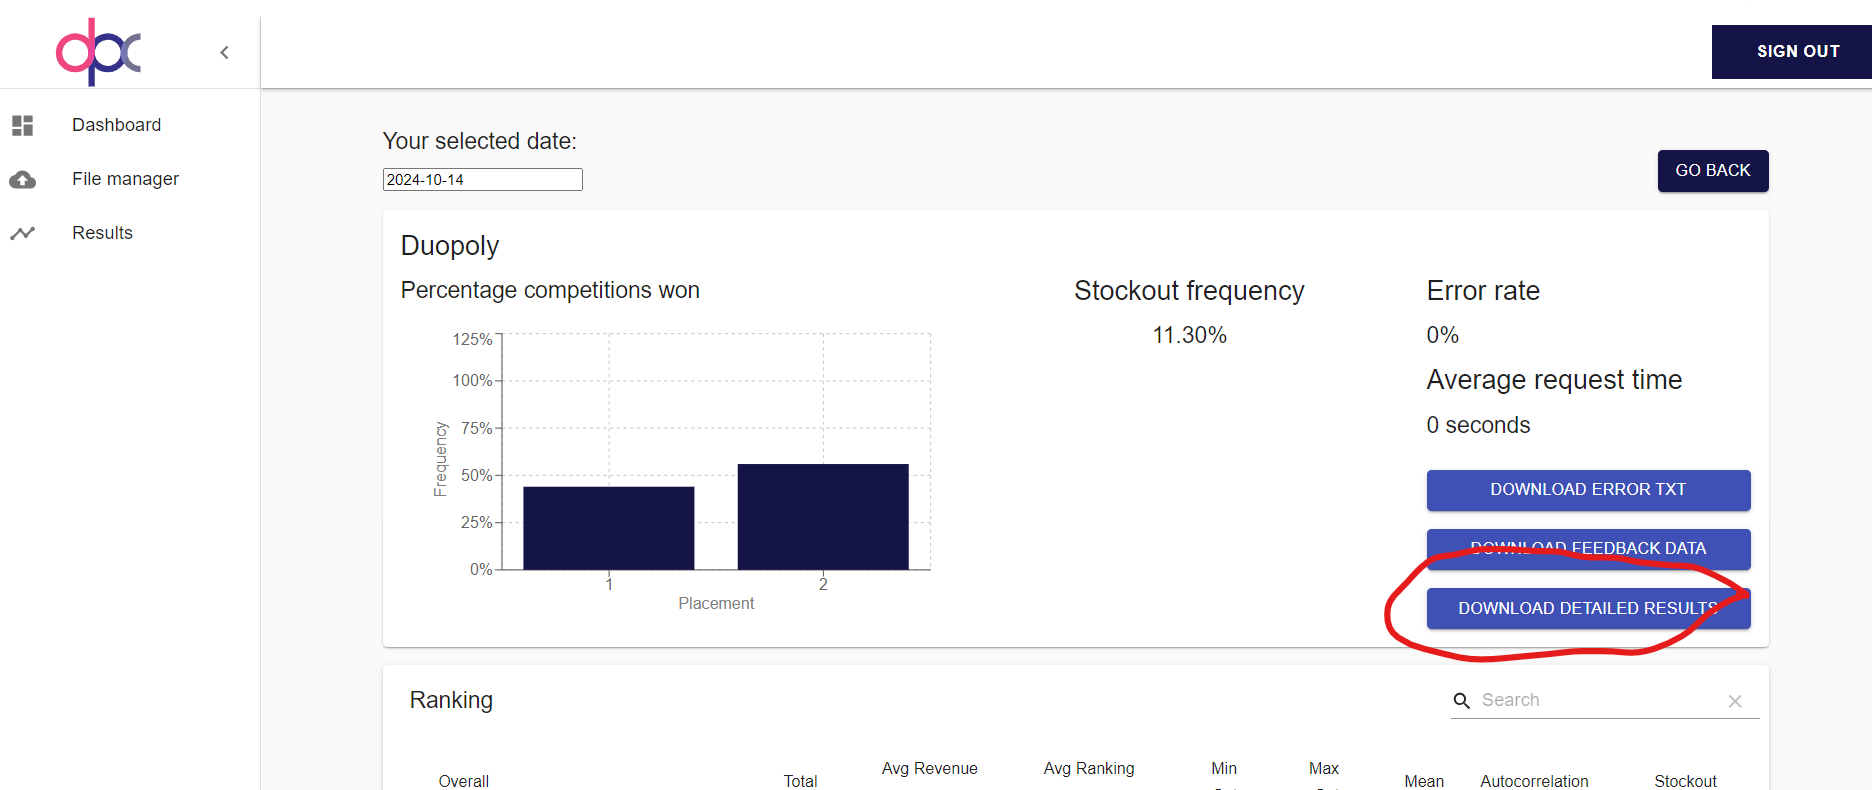

In [23]:
df_comp_details = pd.read_csv('15.11.2025/Quentin/duopoly_competition_details.csv')
df_comp_details.head(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN
3,3eieuu,1,4,DidacticFlounder,37.3,28.8,1,True,0.0,NaN
4,3eieuu,1,5,DidacticFlounder,29.6,32.6,0,True,0.0,NaN
5,3eieuu,1,6,DidacticFlounder,28.1,33.7,0,True,0.0,NaN
6,3eieuu,1,7,DidacticFlounder,26.7,33.7,0,True,0.0,NaN
7,3eieuu,1,8,DidacticFlounder,25.4,32.2,0,True,0.0,NaN
8,3eieuu,1,9,DidacticFlounder,24.1,29.7,2,True,0.0,NaN
9,3eieuu,1,10,DidacticFlounder,32.4,30.6,1,True,0.0,NaN


In [24]:
df_comp_details.groupby('competitor_id').agg({
    'competition_id' : 'nunique',
    'selling_season' : ['max', 'count']
})

competition_id selling_season       
                         nunique            max  count
competitor_id                                         
DidacticFlounder               2            100  20000
ImposingCrocodile              2            100  20000

### create unique selling_season_id

In [25]:
df_comp_details['unique_selling_season_key'] = df_comp_details.apply(lambda r:
                                "%s_%s" % (r.competition_id,r.selling_season), axis=1)

df_comp_details.head(3)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN,3eieuu_1
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN,3eieuu_1
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN,3eieuu_1


#### show revenue distribution over all selling seasons

In [26]:
df_comp_details['revenue'] = df_comp_details['demand'] * df_comp_details['price']

In [35]:
dfx_rev = df_comp_details.groupby('unique_selling_season_key').agg({
    'revenue' : 'sum'
}).reset_index()


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

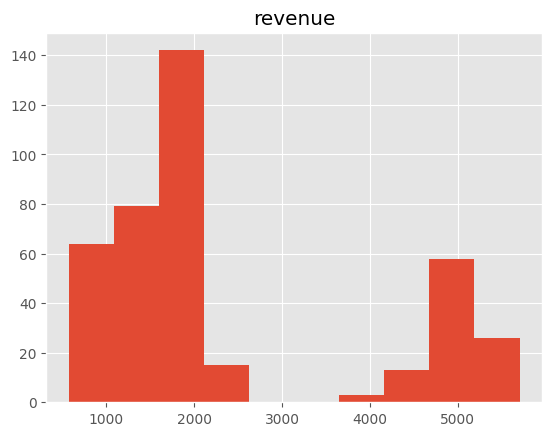

In [36]:
dfx_rev.hist()

In [30]:
dfx_rev_top = dfx_rev.sort_values('revenue', ascending=False)

dfx_rev_top.head(10)

,unique_selling_season_key,revenue
101,3fVyNT_10,5706.4
122,3fVyNT_29,5703.3
199,3fVyNT_99,5603.9
169,3fVyNT_71,5598.1
187,3fVyNT_88,5577.6
188,3fVyNT_89,5540.9
158,3fVyNT_61,5526.2
192,3fVyNT_92,5513.6
142,3fVyNT_47,5503.4
184,3fVyNT_85,5502.3


### visualize the results of one selling season

In [38]:
id = dfx_rev_top['unique_selling_season_key'].values[-1]

df_aux = df_comp_details[df_comp_details.unique_selling_season_key==id]
df_aux.head(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue
31000,jd9PL7,11,1,ImposingCrocodile,47.2,89.0,0,True,0.0,NaN,jd9PL7_11,0.0
31001,jd9PL7,11,2,ImposingCrocodile,67.5,71.2,0,True,0.0,NaN,jd9PL7_11,0.0
31002,jd9PL7,11,3,ImposingCrocodile,69.1,57.0,0,True,0.0,NaN,jd9PL7_11,0.0
31003,jd9PL7,11,4,ImposingCrocodile,46.4,45.6,0,True,0.0,NaN,jd9PL7_11,0.0
31004,jd9PL7,11,5,ImposingCrocodile,54.5,36.5,0,True,0.0,NaN,jd9PL7_11,0.0
31005,jd9PL7,11,6,ImposingCrocodile,54.8,29.2,0,True,0.0,NaN,jd9PL7_11,0.0
31006,jd9PL7,11,7,ImposingCrocodile,64.2,23.3,0,True,0.0,NaN,jd9PL7_11,0.0
31007,jd9PL7,11,8,ImposingCrocodile,42.6,18.7,0,True,0.0,NaN,jd9PL7_11,0.0
31008,jd9PL7,11,9,ImposingCrocodile,55.1,14.9,0,True,0.0,NaN,jd9PL7_11,0.0
31009,jd9PL7,11,10,ImposingCrocodile,57.4,11.9,2,True,0.0,NaN,jd9PL7_11,23.8


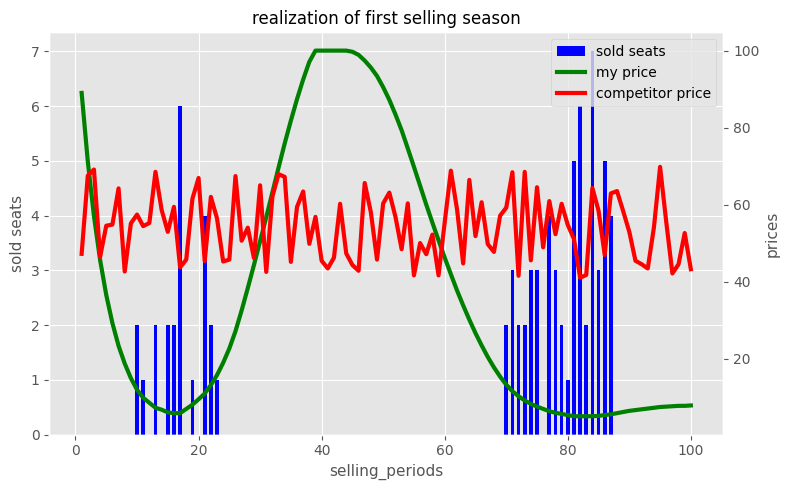

In [32]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(df_aux.selling_period, df_aux.demand, color='b', width=0.6, align='center', label = 'sold seats')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("sold seats" , size=11)

ax_2 = ax.twinx()
ax_2.grid(False)
ax_2.plot(df_aux.selling_period, df_aux.price, color='g', linestyle='-', linewidth=3, label = 'my price')
ax_2.plot(df_aux.selling_period, df_aux.price_competitor, color='r', linestyle='-', linewidth=3, label = 'competitor price')
ax_2.tick_params(axis="both", labelsize=10)
ax_2.set_ylabel("prices" , size=11)

ax.tick_params(axis="both", labelsize=10)
ax.set_title("realization of first selling season", size=12)

# legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_2.get_legend_handles_labels()
ax_2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

# Plot the Capacity Utilization Curve

**capacity utilization = sold quantity / capacity**

In [33]:
df_aux['cum_demand'] = df_aux['demand'].cumsum()
df_aux['cap_util'] = round(df_aux[ 'cum_demand'] / 80 ,2)
df_aux.tail(5)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue,cum_demand,cap_util
31095,jd9PL7,11,96,ImposingCrocodile,55.5,7.5,0,True,0.0,NaN,jd9PL7_11,0.0,80,1.0
31096,jd9PL7,11,97,ImposingCrocodile,42.1,7.6,0,True,0.0,NaN,jd9PL7_11,0.0,80,1.0
31097,jd9PL7,11,98,ImposingCrocodile,44.5,7.7,0,True,0.0,NaN,jd9PL7_11,0.0,80,1.0
31098,jd9PL7,11,99,ImposingCrocodile,52.6,7.7,0,True,0.0,NaN,jd9PL7_11,0.0,80,1.0
31099,jd9PL7,11,100,ImposingCrocodile,43.2,7.8,0,True,0.0,NaN,jd9PL7_11,0.0,80,1.0


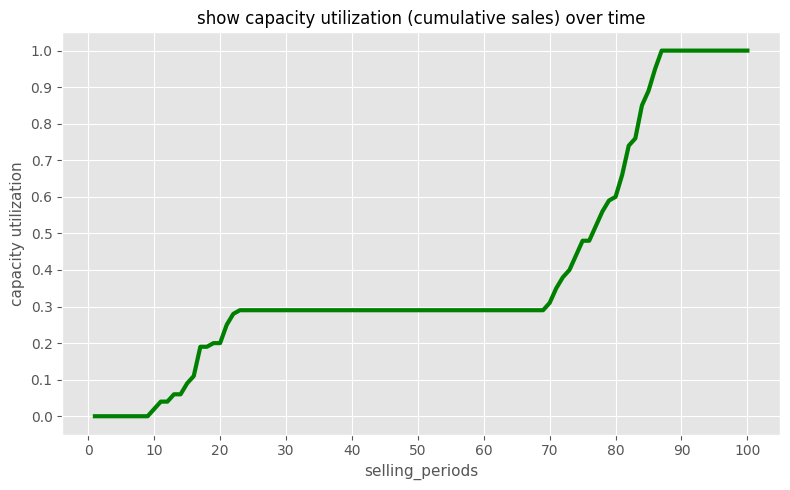

In [34]:
fig, ax = plt.subplots(figsize=(8,5))

# ax.plot(df_aux.selling_period, df_aux.cum_demand, color='b', 
#        width=0.6, align='center', label = 'sold seats')
ax.plot(df_aux.selling_period, df_aux.cap_util, color='g', 
        linestyle='-', linewidth=3, label = 'capacity utilization')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("show capacity utilization (cumulative sales) over time", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()